# **Importing Libraries and Modules**

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import Word
from tensorflow.keras.preprocessing import text, sequence
import seaborn as sns
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition, ensemble
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **EDA**

In [123]:
df = pd.read_csv('/content/sample_data/spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [124]:
df.shape

(5572, 5)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [126]:
df.drop(["Unnamed: 2",	"Unnamed: 3",	"Unnamed: 4"],axis=1,inplace=True)

In [127]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Column Arrangement**

In [128]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df["target"]=df["target"].replace(["ham","spam"],[0,1])

<ipython-input-9-582dd028f0b0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["target"]=df["target"].replace(["ham","spam"],[0,1])


In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# **Duplicated Value Check**

In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep='first')

# **Target Value Information**

In [13]:
df['target'].value_counts()

,count
target,
0,4516
1,653


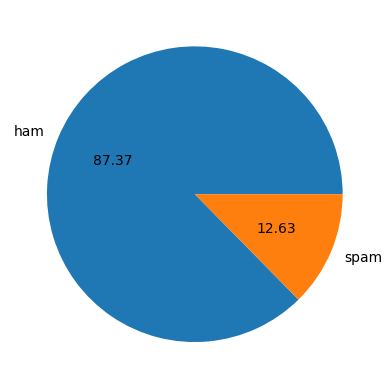

In [14]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# **Preprocessing**

In [15]:
df.columns= df.columns.str.lower()

In [16]:
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
nltk.download('stopwords')
sw = stopwords.words('english')


df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)
df['text'] = df['text'].str.replace('\d', '', regex=True)
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if word not in sw]))
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import re

In [19]:
def remove_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.[a-zA-Z0-9-]+(?:\.[a-zA-Z0-9-]+)+'
    return re.sub(url_pattern, '', text)


def remove_html_tags(text):
    html_pattern = r'<.*?>'
    return re.sub(html_pattern, '', text)


df['text'] = df['text'].apply(lambda x: remove_urls(x))
df['text'] = df['text'].apply(lambda x: remove_html_tags(x))

In [20]:
df.head()

,target,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


# **General Dataset Visualizations**

In [21]:
freq_df= df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
<ipython-input-21-4405e9173135>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df= df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-21-4405e9173135>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  freq_df= df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-21-4405e9173135>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df= df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-21-4405e9173135>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is

**Frequency Table**

In [22]:
freq_df.columns=["words","frequency"]
freq_df

,words,frequency
0,go,298.0
1,jurong,1.0
2,point,32.0
3,crazy,15.0
4,available,14.0
...,...,...
7958,lowes,1.0
7959,salesman,1.0
7960,pity,1.0
7961,soany,1.0


In [23]:
freq_df[freq_df["frequency"]>freq_df["frequency"].mean()+freq_df["frequency"].std()]

,words,frequency
0,go,298.0
2,point,32.0
6,n,126.0
7,great,103.0
10,e,82.0
...,...,...
1989,pic,29.0
2000,fuck,30.0
2140,dad,30.0
2444,shes,29.0


**Frequency Table Visualizations**

In [24]:
visual_bar=freq_df[freq_df["frequency"]>freq_df["frequency"].mean()+freq_df["frequency"].std()]

In [25]:
common_words=visual_bar.sort_values(by="frequency",ascending=False).head(20)

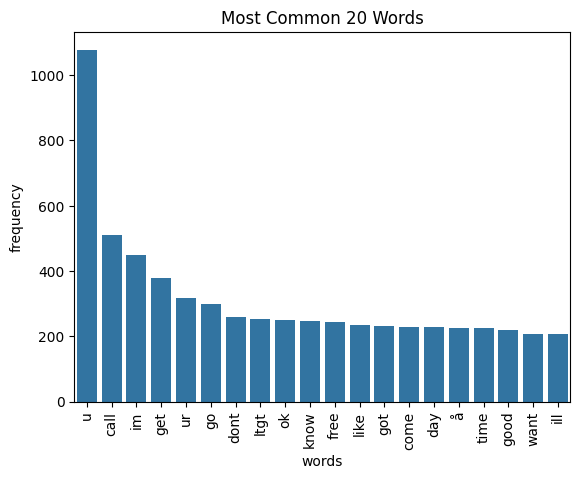

In [26]:
sns.barplot(x=common_words.words, y=common_words.frequency)
plt.xticks(rotation='vertical')
plt.title("Most Common 20 Words")
plt.show()

# **Spam Values EDA**

In [27]:
freq_df_spam= df[df["target"]==1]["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

<ipython-input-27-2aaa2bc79c34>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_spam= df[df["target"]==1]["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-27-2aaa2bc79c34>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  freq_df_spam= df[df["target"]==1]["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-27-2aaa2bc79c34>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_spam= df[df["target"]==1]["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-27-2aaa2bc79c34>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArra

 **Spam Variables Frequency Table**

In [28]:
freq_df_spam.columns=["words","frequency"]
freq_df_spam

,words,frequency
0,fa,2.0
1,entry,21.0
2,free,190.0
3,may,6.0
4,apply,25.0
...,...,...
2058,servs,1.0
2059,india,1.0
2060,inclu,1.0
2061,chatlines,1.0


In [29]:
freq_df_spam[freq_df_spam["frequency"]>freq_df_spam["frequency"].mean()+freq_df_spam["frequency"].std()]

,words,frequency
1,entry,21.0
2,free,190.0
4,apply,25.0
6,txt,126.0
8,receive,27.0
...,...,...
519,b,19.0
540,nd,19.0
541,attempt,22.0
606,every,26.0


# **Visualization of Spam Frequency Table**

In [30]:
visual_bar_spam=freq_df_spam[freq_df_spam["frequency"]>freq_df_spam["frequency"].mean()+freq_df_spam["frequency"].std()]

In [31]:
common_words_spam=visual_bar_spam.sort_values(by="frequency",ascending=False).head(20)

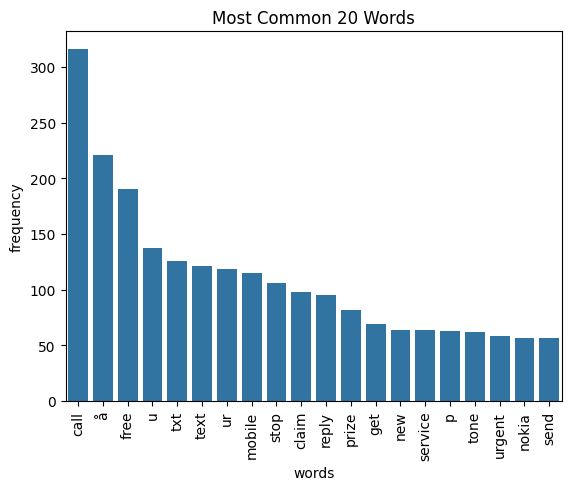

In [32]:
sns.barplot(x=common_words_spam.words, y=common_words_spam.frequency)
plt.xticks(rotation='vertical')
plt.title("Most Common 20 Words")
plt.show()

## **Wordcloud for Most Common Spam Words**

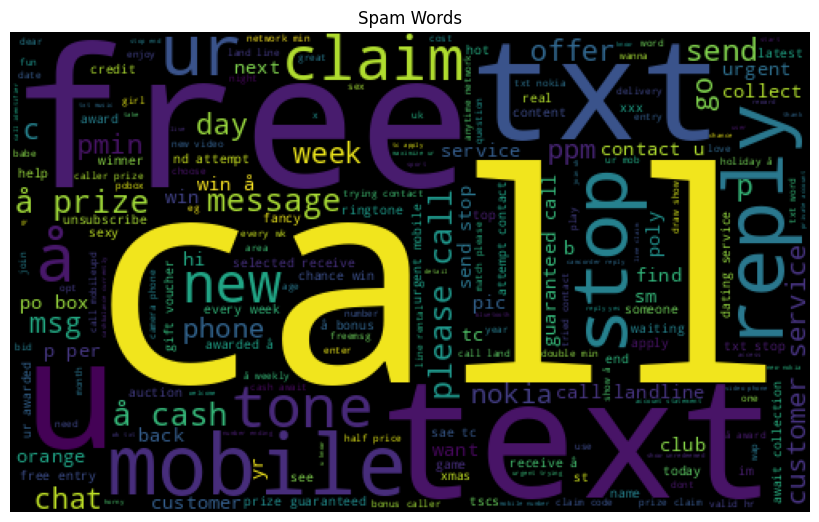

In [33]:
from wordcloud import WordCloud

words_list = df[df['target']==1]["text"].unique().tolist()
spam_words = " ".join(words_list)

spam_wordcloud =  WordCloud(
                  width=500, height = 300
                ).generate(spam_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Spam Words')
plt.show()

**Most Frequent Bigrams in Spam Emails**

In [44]:
from collections import Counter
df_spam=df[df["target"]==1]["text"]


def generate_ngrams(text, n=2):
    words = text.split()
    ngrams = [(words[i], words[i+1]) for i in range(len(words)-n+1)]
    return ngrams

all_bigrams = []

for text in df_spam:
    bigrams = generate_ngrams(text, n=2)
    all_bigrams.extend(bigrams)

bigram_counts = Counter(all_bigrams)

most_common_bigrams = bigram_counts.most_common(10)

print("Most Frequent 2 grams:")
for bigram, count in most_common_bigrams:
    print(f"{bigram}: {count}")


Most Frequent 2 grams:
('å', 'prize'): 41
('please', 'call'): 41
('å', 'cash'): 36
('po', 'box'): 23
('customer', 'service'): 22
('contact', 'u'): 22
('call', 'landline'): 22
('p', 'per'): 22
('guaranteed', 'call'): 21
('prize', 'guaranteed'): 20


**Most Frequent Trigrams in Spam Emails**

In [43]:
from collections import Counter

def generate_ngrams(text, n=3):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

all_trigrams = []

for text in df_spam:
    trigrams = generate_ngrams(text, n=3)
    all_trigrams.extend(trigrams)

trigram_counts = Counter(all_trigrams)

most_common_trigrams = trigram_counts.most_common(10)

print("Most Frequent trigrams:")
for trigram, count in most_common_trigrams:
    print(f"{trigram}: {count}")


Most Frequent trigrams:
('å', 'prize', 'guaranteed'): 19
('prize', 'guaranteed', 'call'): 19
('call', 'land', 'line'): 16
('private', 'account', 'statement'): 15
('call', 'identifier', 'code'): 14
('draw', 'show', 'å'): 13
('identifier', 'code', 'expires'): 13
('guaranteed', 'call', 'land'): 13
('show', 'å', 'prize'): 12
('account', 'statement', 'show'): 12


# **Non-Spam Values EDA**

In [45]:
freq_df_ham= df[df["target"]==0]["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
<ipython-input-45-af7f1b93aa69>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_ham= df[df["target"]==0]["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-45-af7f1b93aa69>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  freq_df_ham= df[df["target"]==0]["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-45-af7f1b93aa69>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_ham= df[df["target"]==0]["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-45-af7f1b93aa69>:1: FutureWarning: value_counts with argument th

 **Frequency Table for Non-Spam Values**

In [46]:
freq_df_ham.columns=["words","frequency"]
freq_df_ham

,words,frequency
0,go,267.0
1,jurong,1.0
2,point,17.0
3,crazy,10.0
4,available,12.0
...,...,...
6789,sony,1.0
6790,salesman,1.0
6791,pity,1.0
6792,soany,1.0


In [47]:
freq_df_ham[freq_df_ham["frequency"]>freq_df_ham["frequency"].mean()+freq_df_ham["frequency"].std()]

,words,frequency
0,go,267.0
6,n,119.0
7,great,94.0
10,e,77.0
13,got,226.0
...,...,...
1626,fuck,30.0
1731,hear,28.0
1748,dad,30.0
2012,shes,29.0


**Visualization of Non-Spam Frequency Table**

In [48]:
visual_bar_ham=freq_df_ham[freq_df_ham["frequency"]>freq_df_ham["frequency"].mean()+freq_df_ham["frequency"].std()]

In [49]:
common_words_ham=visual_bar_ham.sort_values(by="frequency",ascending=False).head(20)

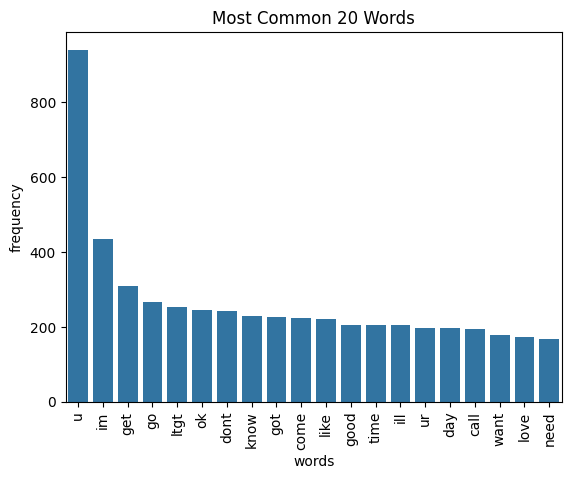

In [50]:
sns.barplot(x=common_words_ham.words, y=common_words_ham.frequency)
plt.xticks(rotation='vertical')
plt.title("Most Common 20 Words")
plt.show()

**WordCloud for Most Common Non-Spam Words**

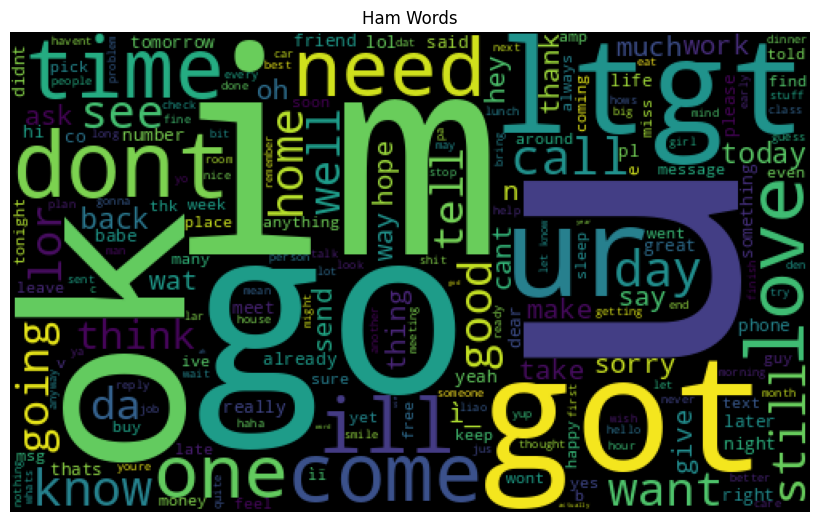

In [51]:
words_list = df[df['target']==0]["text"].unique().tolist()
ham_words = " ".join(words_list)

ham_wordcloud =  WordCloud(
                  width=500, height = 300
                ).generate(ham_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Ham Words')
plt.show()

**Most Frequent Bigrams in Non-Spam Emails**

In [52]:
df_ham=df[df["target"]==0]["text"]


def generate_ngrams(text, n=2):
    words = text.split()
    ngrams = [(words[i], words[i+1]) for i in range(len(words)-n+1)]
    return ngrams

all_bigrams = []

for text in df_ham:
    bigrams = generate_ngrams(text, n=2)
    all_bigrams.extend(bigrams)

bigram_counts = Counter(all_bigrams)

most_common_bigrams = bigram_counts.most_common(10)

print("Most Frequent 2 grams:")
for bigram, count in most_common_bigrams:
    print(f"{bigram}: {count}")

Most Frequent 2 grams:
('let', 'know'): 41
('r', 'u'): 35
('u', 'r'): 31
('dont', 'know'): 30
('new', 'year'): 28
('take', 'care'): 26
('im', 'going'): 24
('good', 'morning'): 23
('u', 'get'): 23
('u', 'wan'): 23


**Most Common Trigrams in Non-Spam Emails**

In [53]:
def generate_ngrams(text, n=3):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

all_trigrams = []

for text in df_ham:
    trigrams = generate_ngrams(text, n=3)
    all_trigrams.extend(trigrams)

trigram_counts = Counter(all_trigrams)

most_common_trigrams = trigram_counts.most_common(10)

print("Most Frequent trigrams:")
for trigram, count in most_common_trigrams:
    print(f"{trigram}: {count}")

Most Frequent trigrams:
('happy', 'new', 'year'): 17
('ill', 'call', 'later'): 11
('hi', 'hi', 'hi'): 11
('sorry', 'ill', 'call'): 8
('wat', 'time', 'u'): 8
('x', 'x', 'x'): 8
('kiss', 'across', 'sea'): 6
('u', 'wan', 'go'): 6
('u', 'dun', 'wan'): 6
('call', 'later', 'meeting'): 5


# **Train-Test Split**

In [58]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["text"],
                                                                   df["target"],
                                                                    random_state = 1)

In [59]:
encoder = preprocessing.LabelEncoder()

In [60]:
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

# **Count Vectorizer**

In [63]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer()

In [64]:
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

# **Tf-Idf Vectorizer**

In [65]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

TfidfVectorizer()

In [66]:
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

# **N-Grams**

In [67]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(train_x)

TfidfVectorizer(ngram_range=(2, 3))

In [68]:
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

# **Char-Level**

In [77]:
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_chars_vectorizer.fit(train_x)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [78]:
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(train_x)
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(test_x)

# **Machine Learning Models**

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Logistic Regression**

In [70]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_count, train_y)

y_pred = log_model.predict(x_test_count)


accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Count Vectors Accuracy: {:.3f}".format(accuracy))
print("Count Vectors Precision (Macro): {:.3f}".format(precision_macro))
print("Count Vectors Recall (Macro): {:.3f}".format(recall_macro))
print("Count Vectors F1-Score (Macro): {:.3f}".format(f1_macro))
print("Count Vectors Precision (Micro): {:.3f}".format(precision_micro))
print("Count Vectors Recall (Micro): {:.3f}".format(recall_micro))
print("Count Vectors F1-Score (Micro): {:.3f}".format(f1_micro))

Count Vectors Accuracy: 0.969
Count Vectors Precision (Macro): 0.973
Count Vectors Recall (Macro): 0.887
Count Vectors F1-Score (Macro): 0.924
Count Vectors Precision (Micro): 0.969
Count Vectors Recall (Micro): 0.969
Count Vectors F1-Score (Micro): 0.969


In [71]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, train_y)
y_pred = log_model.predict(x_test_tf_idf_word)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_macro = f1_score(test_y, y_pred, average='macro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Word-Level TF-IDF Accuracy: {:.3f}".format(accuracy))
print("Word-Level TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("Word-Level TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("Word-Level TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("Word-Level TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("Word-Level TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("Word-Level TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


Word-Level TF-IDF Accuracy: 0.950
Word-Level TF-IDF Precision (Macro): 0.956
Word-Level TF-IDF Recall (Macro): 0.813
Word-Level TF-IDF F1-Score (Macro): 0.867
Word-Level TF-IDF Precision (Micro): 0.950
Word-Level TF-IDF Recall (Micro): 0.950
Word-Level TF-IDF F1-Score (Micro): 0.950


In [72]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_ngram, train_y)

y_pred = log_model.predict(x_test_tf_idf_ngram)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("N-GRAM TF-IDF Accuracy: {:.3f}".format(accuracy))
print("N-GRAM TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("N-GRAM TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("N-GRAM TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("N-GRAM TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("N-GRAM TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("N-GRAM TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


N-GRAM TF-IDF Accuracy: 0.882
N-GRAM TF-IDF Precision (Macro): 0.908
N-GRAM TF-IDF Recall (Macro): 0.542
N-GRAM TF-IDF F1-Score (Macro): 0.546
N-GRAM TF-IDF Precision (Micro): 0.882
N-GRAM TF-IDF Recall (Micro): 0.882
N-GRAM TF-IDF F1-Score (Micro): 0.882


In [79]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_chars, train_y)


y_pred = log_model.predict(x_test_tf_idf_chars)


accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')


print("Char-Level TF-IDF Accuracy: {:.3f}".format(accuracy))
print("Char-Level TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("Char-Level TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("Char-Level TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("Char-Level TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("Char-Level TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("Char-Level TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))

Char-Level TF-IDF Accuracy: 0.956
Char-Level TF-IDF Precision (Macro): 0.976
Char-Level TF-IDF Recall (Macro): 0.827
Char-Level TF-IDF F1-Score (Macro): 0.883
Char-Level TF-IDF Precision (Micro): 0.956
Char-Level TF-IDF Recall (Micro): 0.956
Char-Level TF-IDF F1-Score (Micro): 0.956


# **Naive Bayes**

In [73]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count, train_y)

y_pred = nb_model.predict(x_test_count)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Count Vectors Accuracy: {:.3f}".format(accuracy))
print("Count Vectors Precision (Macro): {:.3f}".format(precision_macro))
print("Count Vectors Recall (Macro): {:.3f}".format(recall_macro))
print("Count Vectors F1-Score (Macro): {:.3f}".format(f1_macro))
print("Count Vectors Precision (Micro): {:.3f}".format(precision_micro))
print("Count Vectors Recall (Micro): {:.3f}".format(recall_micro))
print("Count Vectors F1-Score (Micro): {:.3f}".format(f1_micro))

Count Vectors Accuracy: 0.978
Count Vectors Precision (Macro): 0.956
Count Vectors Recall (Macro): 0.946
Count Vectors F1-Score (Macro): 0.951
Count Vectors Precision (Micro): 0.978
Count Vectors Recall (Micro): 0.978
Count Vectors F1-Score (Micro): 0.978


In [74]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_word, train_y)

y_pred = nb_model.predict(x_test_tf_idf_word)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Word-Level TF-IDF Accuracy: {:.3f}".format(accuracy))
print("Word-Level TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("Word-Level TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("Word-Level TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("Word-Level TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("Word-Level TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("Word-Level TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))

Word-Level TF-IDF Accuracy: 0.955
Word-Level TF-IDF Precision (Macro): 0.976
Word-Level TF-IDF Recall (Macro): 0.824
Word-Level TF-IDF F1-Score (Macro): 0.881
Word-Level TF-IDF Precision (Micro): 0.955
Word-Level TF-IDF Recall (Micro): 0.955
Word-Level TF-IDF F1-Score (Micro): 0.955


In [75]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_ngram, train_y)

y_pred = nb_model.predict(x_test_tf_idf_ngram)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("N-GRAM TF-IDF Accuracy: {:.3f}".format(accuracy))
print("N-GRAM TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("N-GRAM TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("N-GRAM TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("N-GRAM TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("N-GRAM TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("N-GRAM TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))

N-GRAM TF-IDF Accuracy: 0.916
N-GRAM TF-IDF Precision (Macro): 0.956
N-GRAM TF-IDF Recall (Macro): 0.673
N-GRAM TF-IDF F1-Score (Macro): 0.734
N-GRAM TF-IDF Precision (Micro): 0.916
N-GRAM TF-IDF Recall (Micro): 0.916
N-GRAM TF-IDF F1-Score (Micro): 0.916


In [80]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_chars, train_y)

y_pred = nb_model.predict(x_test_tf_idf_chars)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("CHARLEVEL TF-IDF Accuracy: {:.3f}".format(accuracy))
print("CHARLEVEL TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("CHARLEVEL TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("CHARLEVEL TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("CHARLEVEL TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("CHARLEVEL TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("CHARLEVEL TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


CHARLEVEL TF-IDF Accuracy: 0.920
CHARLEVEL TF-IDF Precision (Macro): 0.958
CHARLEVEL TF-IDF Recall (Macro): 0.685
CHARLEVEL TF-IDF F1-Score (Macro): 0.748
CHARLEVEL TF-IDF Precision (Micro): 0.920
CHARLEVEL TF-IDF Recall (Micro): 0.920
CHARLEVEL TF-IDF F1-Score (Micro): 0.920


# **Support Vector Machine**

In [82]:
svm = SVC(kernel='sigmoid')
svm_model = svm.fit(x_train_count, train_y)

y_pred = svm_model.predict(x_test_count)


accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Count Vectors Accuracy: {:.3f}".format(accuracy))
print("Count Vectors Precision (Macro): {:.3f}".format(precision_macro))
print("Count Vectors Recall (Macro): {:.3f}".format(recall_macro))
print("Count Vectors F1-Score (Macro): {:.3f}".format(f1_macro))
print("Count Vectors Precision (Micro): {:.3f}".format(precision_micro))
print("Count Vectors Recall (Micro): {:.3f}".format(recall_micro))
print("Count Vectors F1-Score (Micro): {:.3f}".format(f1_micro))

Count Vectors Accuracy: 0.970
Count Vectors Precision (Macro): 0.976
Count Vectors Recall (Macro): 0.887
Count Vectors F1-Score (Macro): 0.925
Count Vectors Precision (Micro): 0.970
Count Vectors Recall (Micro): 0.970
Count Vectors F1-Score (Micro): 0.970


In [83]:
svm = SVC(kernel="sigmoid")
svm_model = svm.fit(x_train_tf_idf_word, train_y)

y_pred = svm_model.predict(x_test_tf_idf_word)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Word-Level TF-IDF Accuracy: {:.3f}".format(accuracy))
print("Word-Level TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("Word-Level TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("Word-Level TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("Word-Level TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("Word-Level TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("Word-Level TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))

Word-Level TF-IDF Accuracy: 0.974
Word-Level TF-IDF Precision (Macro): 0.967
Word-Level TF-IDF Recall (Macro): 0.912
Word-Level TF-IDF F1-Score (Macro): 0.937
Word-Level TF-IDF Precision (Micro): 0.974
Word-Level TF-IDF Recall (Micro): 0.974
Word-Level TF-IDF F1-Score (Micro): 0.974


In [85]:
svm = SVC(kernel="sigmoid")
svm_model = svm.fit(x_train_tf_idf_ngram, train_y)

y_pred = svm_model.predict(x_test_tf_idf_ngram)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("N-GRAM TF-IDF Accuracy: {:.3f}".format(accuracy))
print("N-GRAM TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("N-GRAM TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("N-GRAM TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("N-GRAM TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("N-GRAM TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("N-GRAM TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))

N-GRAM TF-IDF Accuracy: 0.947
N-GRAM TF-IDF Precision (Macro): 0.962
N-GRAM TF-IDF Recall (Macro): 0.796
N-GRAM TF-IDF F1-Score (Macro): 0.855
N-GRAM TF-IDF Precision (Micro): 0.947
N-GRAM TF-IDF Recall (Micro): 0.947
N-GRAM TF-IDF F1-Score (Micro): 0.947


In [96]:
svm = SVC(kernel="sigmoid")
svm_model = svm.fit(x_train_tf_idf_chars, train_y)

y_pred = svm_model.predict(x_test_tf_idf_chars)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("CHARLEVEL TF-IDF Accuracy: {:.3f}".format(accuracy))
print("CHARLEVEL TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("CHARLEVEL TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("CHARLEVEL TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("CHARLEVEL TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("CHARLEVEL TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("CHARLEVEL TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


CHARLEVEL TF-IDF Accuracy: 0.973
CHARLEVEL TF-IDF Precision (Macro): 0.978
CHARLEVEL TF-IDF Recall (Macro): 0.899
CHARLEVEL TF-IDF F1-Score (Macro): 0.934
CHARLEVEL TF-IDF Precision (Micro): 0.973
CHARLEVEL TF-IDF Recall (Micro): 0.973
CHARLEVEL TF-IDF F1-Score (Micro): 0.973


# **KNN**

In [92]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(x_train_count, train_y)

y_pred = knn_model.predict(x_test_count)


accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Count Vectors Accuracy: {:.3f}".format(accuracy))
print("Count Vectors Precision (Macro): {:.3f}".format(precision_macro))
print("Count Vectors Recall (Macro): {:.3f}".format(recall_macro))
print("Count Vectors F1-Score (Macro): {:.3f}".format(f1_macro))
print("Count Vectors Precision (Micro): {:.3f}".format(precision_micro))
print("Count Vectors Recall (Micro): {:.3f}".format(recall_micro))
print("Count Vectors F1-Score (Micro): {:.3f}".format(f1_micro))

Count Vectors Accuracy: 0.917
Count Vectors Precision (Macro): 0.957
Count Vectors Recall (Macro): 0.676
Count Vectors F1-Score (Macro): 0.737
Count Vectors Precision (Micro): 0.917
Count Vectors Recall (Micro): 0.917
Count Vectors F1-Score (Micro): 0.917


In [93]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(x_train_tf_idf_word, train_y)

y_pred = knn_model.predict(x_test_tf_idf_word)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Word-Level TF-IDF Accuracy: {:.3f}".format(accuracy))
print("Word-Level TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("Word-Level TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("Word-Level TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("Word-Level TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("Word-Level TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("Word-Level TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))

Word-Level TF-IDF Accuracy: 0.921
Word-Level TF-IDF Precision (Macro): 0.959
Word-Level TF-IDF Recall (Macro): 0.691
Word-Level TF-IDF F1-Score (Macro): 0.755
Word-Level TF-IDF Precision (Micro): 0.921
Word-Level TF-IDF Recall (Micro): 0.921
Word-Level TF-IDF F1-Score (Micro): 0.921


In [94]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(x_train_tf_idf_ngram, train_y)

y_pred = knn_model.predict(x_test_tf_idf_ngram)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("N-GRAM TF-IDF Accuracy: {:.3f}".format(accuracy))
print("N-GRAM TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("N-GRAM TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("N-GRAM TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("N-GRAM TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("N-GRAM TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("N-GRAM TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))

N-GRAM TF-IDF Accuracy: 0.906
N-GRAM TF-IDF Precision (Macro): 0.951
N-GRAM TF-IDF Recall (Macro): 0.630
N-GRAM TF-IDF F1-Score (Macro): 0.681
N-GRAM TF-IDF Precision (Micro): 0.906
N-GRAM TF-IDF Recall (Micro): 0.906
N-GRAM TF-IDF F1-Score (Micro): 0.906


In [95]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(x_train_tf_idf_chars, train_y)

y_pred = knn_model.predict(x_test_tf_idf_chars)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("CHARLEVEL TF-IDF Accuracy: {:.3f}".format(accuracy))
print("CHARLEVEL TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("CHARLEVEL TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("CHARLEVEL TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("CHARLEVEL TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("CHARLEVEL TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("CHARLEVEL TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


CHARLEVEL TF-IDF Accuracy: 0.923
CHARLEVEL TF-IDF Precision (Macro): 0.953
CHARLEVEL TF-IDF Recall (Macro): 0.703
CHARLEVEL TF-IDF F1-Score (Macro): 0.767
CHARLEVEL TF-IDF Precision (Micro): 0.923
CHARLEVEL TF-IDF Recall (Micro): 0.923
CHARLEVEL TF-IDF F1-Score (Micro): 0.923


# **Random Forest**

In [98]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count, train_y)

y_pred = rf_model.predict(x_test_count)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Count Vectors Random Forest Accuracy: {:.3f}".format(accuracy))
print("Count Vectors Random Forest Precision (Macro): {:.3f}".format(precision_macro))
print("Count Vectors Random Forest Recall (Macro): {:.3f}".format(recall_macro))
print("Count Vectors Random Forest F1-Score (Macro): {:.3f}".format(f1_macro))
print("Count Vectors Random Forest Precision (Micro): {:.3f}".format(precision_micro))
print("Count Vectors Random Forest Recall (Micro): {:.3f}".format(recall_micro))
print("Count Vectors Random Forest F1-Score (Micro): {:.3f}".format(f1_micro))

Count Vectors Random Forest Accuracy: 0.969
Count Vectors Random Forest Precision (Macro): 0.983
Count Vectors Random Forest Recall (Macro): 0.879
Count Vectors Random Forest F1-Score (Macro): 0.922
Count Vectors Random Forest Precision (Micro): 0.969
Count Vectors Random Forest Recall (Micro): 0.969
Count Vectors Random Forest F1-Score (Micro): 0.969


In [99]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_word, train_y)

y_pred = rf_model.predict(x_test_tf_idf_word)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Word-Level TF-IDF Random Forest Accuracy: {:.3f}".format(accuracy))
print("Word-Level TF-IDF Random Forest Precision (Macro): {:.3f}".format(precision_macro))
print("Word-Level TF-IDF Random Forest Recall (Macro): {:.3f}".format(recall_macro))
print("Word-Level TF-IDF Random Forest F1-Score (Macro): {:.3f}".format(f1_macro))
print("Word-Level TF-IDF Random Forest Precision (Micro): {:.3f}".format(precision_micro))
print("Word-Level TF-IDF Random Forest Recall (Micro): {:.3f}".format(recall_micro))
print("Word-Level TF-IDF Random Forest F1-Score (Micro): {:.3f}".format(f1_micro))

Word-Level TF-IDF Random Forest Accuracy: 0.969
Word-Level TF-IDF Random Forest Precision (Macro): 0.983
Word-Level TF-IDF Random Forest Recall (Macro): 0.879
Word-Level TF-IDF Random Forest F1-Score (Macro): 0.922
Word-Level TF-IDF Random Forest Precision (Micro): 0.969
Word-Level TF-IDF Random Forest Recall (Micro): 0.969
Word-Level TF-IDF Random Forest F1-Score (Micro): 0.969


In [100]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_ngram, train_y)

y_pred = rf_model.predict(x_test_tf_idf_ngram)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("N-GRAM TF-IDF Random Forest Accuracy: {:.3f}".format(accuracy))
print("N-GRAM TF-IDF Random Forest Precision (Macro): {:.3f}".format(precision_macro))
print("N-GRAM TF-IDF Random Forest Recall (Macro): {:.3f}".format(recall_macro))
print("N-GRAM TF-IDF Random Forest F1-Score (Macro): {:.3f}".format(f1_macro))
print("N-GRAM TF-IDF Random Forest Precision (Micro): {:.3f}".format(precision_micro))
print("N-GRAM TF-IDF Random Forest Recall (Micro): {:.3f}".format(recall_micro))
print("N-GRAM TF-IDF Random Forest F1-Score (Micro): {:.3f}".format(f1_micro))

N-GRAM TF-IDF Random Forest Accuracy: 0.936
N-GRAM TF-IDF Random Forest Precision (Macro): 0.960
N-GRAM TF-IDF Random Forest Recall (Macro): 0.751
N-GRAM TF-IDF Random Forest F1-Score (Macro): 0.816
N-GRAM TF-IDF Random Forest Precision (Micro): 0.936
N-GRAM TF-IDF Random Forest Recall (Micro): 0.936
N-GRAM TF-IDF Random Forest F1-Score (Micro): 0.936


In [101]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_chars, train_y)

y_pred = rf_model.predict(x_test_tf_idf_chars)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("CHARLEVEL TF-IDF Random Forest Accuracy: {:.3f}".format(accuracy))
print("CHARLEVEL TF-IDF Random Forest Precision (Macro): {:.3f}".format(precision_macro))
print("CHARLEVEL TF-IDF Random Forest Recall (Macro): {:.3f}".format(recall_macro))
print("CHARLEVEL TF-IDF Random Forest F1-Score (Macro): {:.3f}".format(f1_macro))
print("CHARLEVEL TF-IDF Random Forest Precision (Micro): {:.3f}".format(precision_micro))
print("CHARLEVEL TF-IDF Random Forest Recall (Micro): {:.3f}".format(recall_micro))
print("CHARLEVEL TF-IDF Random Forest F1-Score (Micro): {:.3f}".format(f1_micro))

CHARLEVEL TF-IDF Random Forest Accuracy: 0.971
CHARLEVEL TF-IDF Random Forest Precision (Macro): 0.984
CHARLEVEL TF-IDF Random Forest Recall (Macro): 0.885
CHARLEVEL TF-IDF Random Forest F1-Score (Macro): 0.927
CHARLEVEL TF-IDF Random Forest Precision (Micro): 0.971
CHARLEVEL TF-IDF Random Forest Recall (Micro): 0.971
CHARLEVEL TF-IDF Random Forest F1-Score (Micro): 0.971


# **Best Model Prediction Test**

Since in this case precision metric is most important, the model which has highest precision was selected

In [102]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_chars, train_y)

In [111]:
mail1 = pd.Series("Congratulations, you've just won a $1000 gift card, claim your prize now by clicking the link below!")

In [112]:
tf_idf_char = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_char.fit(train_x)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [113]:
mail1 = tf_idf_char.transform(mail1)

In [114]:
rf_model.predict(mail1)

array([1])

Result:Success